# Before validation we have to fit the model with the help of pipeline


In [51]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

# Models 
    1. Random Forest Regressor
    2. Cat Boost Regressor
    3. XGB Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import xgboost as xgb


In [53]:
data = pd.read_csv("used_car_dataset_processed(khi).csv")
if 'Unnamed: 0' in data.columns:
    data.drop(columns='Unnamed: 0', inplace=True)


In [54]:
data.dropna(inplace=True)
data

,car_name,model_year,manufacturer,fuel_type,transmission,engine_cc,kms_driven,price_pkr
0,A4,2008.0,Audi,Petrol,Automatic,1800.0,100000.0,4700000.0
1,A4,2001.0,Audi,Petrol,Automatic,1800.0,12345.0,1925000.0
2,A4,2008.0,Audi,Petrol,Automatic,1800.0,50000.0,5500000.0
3,A4,2010.0,Audi,Petrol,Automatic,1800.0,43000.0,5250000.0
4,A4,2017.0,Audi,Petrol,Automatic,1400.0,45000.0,13500000.0
...,...,...,...,...,...,...,...,...
12995,Sienta,2017.0,Toyota,Petrol,Automatic,1500.0,76000.0,5800000.0
12996,Corolla,2021.0,Toyota,Petrol,Automatic,1798.0,50000.0,6500000.0
12997,Corolla Axio,2017.0,Toyota,Petrol,Automatic,1500.0,60000.0,6300000.0
12998,Corolla,2011.0,Toyota,Petrol,Manual,1300.0,100000.0,1880000.0


In [55]:
X = data.drop(('price_pkr'),axis=1)  
y = data['price_pkr']

# Random Forest



In [56]:
column_transformer = ColumnTransformer(
    transformers=[
        ('one_hot', MinMaxScaler(), ['model_year', 'engine_cc', 'kms_driven']),
        ('scaling', OneHotEncoder(), ['car_name', 'manufacturer', 'fuel_type', 'transmission'])
    ],
    remainder='passthrough'
)

# Create the final pipeline
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('model', RandomForestRegressor(n_estimators=500,
                                    max_depth=10,
                                    random_state=51))  #from Car Price Prediction (Best Models Findings).py 
])


model=pipeline.fit(X,y)


joblib.dump(model,"Random_Forest.pkl")  # model saving

['Random_Forest.pkl']

# Cat Boost Regressor  (CBR)

In [57]:
column_transformer = ColumnTransformer(
    transformers=[
        ('one_hot', MinMaxScaler(), ['model_year', 'engine_cc', 'kms_driven']),
        ('scaling', OneHotEncoder(), ['car_name', 'manufacturer', 'fuel_type', 'transmission'])
    ],
    remainder='passthrough'
)

# Create the final pipeline
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('model', CatBoostRegressor(n_estimators=500,
                              depth=8,
                              learning_rate=0.1,
                              loss_function='RMSE',
                              random_state=42))  #from Car Price Prediction (Best Models Findings).py 
])

model=pipeline.fit(X,y)


joblib.dump(model,"cat_boost_regressor.pkl")  # model saving

0:	learn: 5783375.5307484	total: 11.4ms	remaining: 5.71s
1:	learn: 5346584.2630260	total: 21.4ms	remaining: 5.33s
2:	learn: 4967482.1531028	total: 33.3ms	remaining: 5.51s
3:	learn: 4616275.8718152	total: 45.2ms	remaining: 5.61s
4:	learn: 4313566.4099210	total: 55.3ms	remaining: 5.47s
5:	learn: 4023581.7978985	total: 66.8ms	remaining: 5.5s
6:	learn: 3752135.4346387	total: 78.3ms	remaining: 5.51s
7:	learn: 3528520.5355899	total: 90.7ms	remaining: 5.58s
8:	learn: 3312032.9402593	total: 102ms	remaining: 5.56s
9:	learn: 3118282.7680056	total: 115ms	remaining: 5.63s
10:	learn: 2928436.2133833	total: 125ms	remaining: 5.57s
11:	learn: 2761626.3286891	total: 134ms	remaining: 5.46s
12:	learn: 2608816.4673563	total: 146ms	remaining: 5.47s
13:	learn: 2479442.2378800	total: 156ms	remaining: 5.43s
14:	learn: 2351625.5948636	total: 172ms	remaining: 5.55s
15:	learn: 2242938.6647411	total: 188ms	remaining: 5.69s
16:	learn: 2146876.0625749	total: 201ms	remaining: 5.7s
17:	learn: 2049925.4208358	total: 2

161:	learn: 774189.6768490	total: 1.68s	remaining: 3.5s
162:	learn: 771419.5375893	total: 1.69s	remaining: 3.49s
163:	learn: 770498.5938839	total: 1.7s	remaining: 3.48s
164:	learn: 769669.6037998	total: 1.71s	remaining: 3.47s
165:	learn: 767172.7320205	total: 1.72s	remaining: 3.46s
166:	learn: 765637.7795901	total: 1.73s	remaining: 3.44s
167:	learn: 762217.3485683	total: 1.74s	remaining: 3.43s
168:	learn: 760470.9053575	total: 1.75s	remaining: 3.42s
169:	learn: 757120.5961899	total: 1.76s	remaining: 3.41s
170:	learn: 756289.5988931	total: 1.77s	remaining: 3.4s
171:	learn: 755541.2189944	total: 1.78s	remaining: 3.39s
172:	learn: 753411.9117138	total: 1.79s	remaining: 3.38s
173:	learn: 752316.8705017	total: 1.8s	remaining: 3.37s
174:	learn: 751259.8463869	total: 1.81s	remaining: 3.35s
175:	learn: 748763.7740838	total: 1.82s	remaining: 3.34s
176:	learn: 746409.3110583	total: 1.83s	remaining: 3.33s
177:	learn: 744936.5986126	total: 1.84s	remaining: 3.32s
178:	learn: 743091.8717017	total: 1

307:	learn: 605848.7645638	total: 3.31s	remaining: 2.06s
308:	learn: 604922.9853133	total: 3.32s	remaining: 2.05s
309:	learn: 603761.4512751	total: 3.33s	remaining: 2.04s
310:	learn: 603448.5644956	total: 3.34s	remaining: 2.03s
311:	learn: 603181.9149929	total: 3.35s	remaining: 2.02s
312:	learn: 602803.6147235	total: 3.36s	remaining: 2.01s
313:	learn: 602551.1889873	total: 3.37s	remaining: 2s
314:	learn: 602245.0669323	total: 3.38s	remaining: 1.99s
315:	learn: 601613.7895241	total: 3.4s	remaining: 1.98s
316:	learn: 600275.1695814	total: 3.41s	remaining: 1.97s
317:	learn: 599673.3770161	total: 3.42s	remaining: 1.96s
318:	learn: 599180.1208034	total: 3.42s	remaining: 1.94s
319:	learn: 598624.9579567	total: 3.44s	remaining: 1.93s
320:	learn: 598370.4522683	total: 3.44s	remaining: 1.92s
321:	learn: 598069.8035549	total: 3.45s	remaining: 1.91s
322:	learn: 597270.5353877	total: 3.46s	remaining: 1.9s
323:	learn: 596703.5086559	total: 3.47s	remaining: 1.89s
324:	learn: 595582.2271244	total: 3.

455:	learn: 525319.1449541	total: 4.76s	remaining: 460ms
456:	learn: 525001.8226120	total: 4.78s	remaining: 449ms
457:	learn: 524720.3410862	total: 4.79s	remaining: 439ms
458:	learn: 524547.2632579	total: 4.8s	remaining: 429ms
459:	learn: 524030.3366833	total: 4.81s	remaining: 418ms
460:	learn: 523677.9775059	total: 4.82s	remaining: 408ms
461:	learn: 523191.3746242	total: 4.83s	remaining: 398ms
462:	learn: 522670.7787457	total: 4.84s	remaining: 387ms
463:	learn: 522552.4372968	total: 4.86s	remaining: 377ms
464:	learn: 520807.8842276	total: 4.87s	remaining: 366ms
465:	learn: 520167.4736100	total: 4.88s	remaining: 356ms
466:	learn: 520025.3466105	total: 4.89s	remaining: 345ms
467:	learn: 519748.8502016	total: 4.9s	remaining: 335ms
468:	learn: 519082.6080402	total: 4.91s	remaining: 325ms
469:	learn: 517538.0740217	total: 4.92s	remaining: 314ms
470:	learn: 517377.8280244	total: 4.93s	remaining: 304ms
471:	learn: 516975.5285507	total: 4.94s	remaining: 293ms
472:	learn: 516594.6945536	total:

['cat_boost_regressor.pkl']

# XGB Regressor

In [58]:
import xgboost as xgb
column_transformer = ColumnTransformer(
    transformers=[
        ('one_hot', MinMaxScaler(), ['model_year', 'engine_cc', 'kms_driven']),
        ('scaling', OneHotEncoder(), ['car_name', 'manufacturer', 'fuel_type', 'transmission'])
    ],
    remainder='passthrough'
)

# Create the final pipeline
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('model', xgb.XGBRegressor(objective='reg:squarederror',
                             random_state=42,
                             max_depth=5,
                             depth=3,
                             leaning_rate=0.3,
                             n_estimators=100)) #from Car Price Prediction (Best Models Findings).py 
])

 
model=pipeline.fit(X, y)

joblib.dump(model,"XGB_regressor.pkl")  # model saving

C:\Users\HP\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [11:43:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "depth", "leaning_rate" } are not used.

  warnings.warn(smsg, UserWarning)


['XGB_regressor.pkl']

# Validation Dataset

In [59]:
validation_data=pd.read_csv("validation_car(khi).csv")
if 'Unnamed: 0' in validation_data.columns:
    validation_data.drop(columns='Unnamed: 0', inplace=True)
validation_data.dropna(inplace=True)
validation_data

,car_name,model_year,manufacturer,fuel_type,transmission,engine_cc,kms_driven,price_pkr
0,Corolla,1986.0,Toyota,Petrol,Manual,1300.0,125000.0,350000.0
1,Corolla,2008.0,Toyota,Petrol,Manual,1300.0,225500.0,1550000.0
2,Vitz,2012.0,Toyota,Petrol,Automatic,1000.0,75000.0,2610000.0
3,Corolla,2022.0,Toyota,Petrol,Automatic,1798.0,7000.0,7350000.0
4,Hilux,2021.0,Toyota,Diesel,Automatic,2800.0,11000.0,13000000.0
...,...,...,...,...,...,...,...,...
215,Corolla,2012.0,Toyota,Petrol,Automatic,1600.0,180000.0,2400000.0
216,Hilux,2023.0,Toyota,Diesel,Automatic,2800.0,30.0,18800000.0
217,Vitz,2010.0,Toyota,Petrol,Automatic,1000.0,166870.0,2135000.0
218,Hilux,2023.0,Toyota,Diesel,Automatic,2800.0,10.0,17000000.0


In [60]:
actual_price=validation_data['price_pkr']
validation_data.drop('price_pkr', axis=1 ,inplace=True)
validation_data

,car_name,model_year,manufacturer,fuel_type,transmission,engine_cc,kms_driven
0,Corolla,1986.0,Toyota,Petrol,Manual,1300.0,125000.0
1,Corolla,2008.0,Toyota,Petrol,Manual,1300.0,225500.0
2,Vitz,2012.0,Toyota,Petrol,Automatic,1000.0,75000.0
3,Corolla,2022.0,Toyota,Petrol,Automatic,1798.0,7000.0
4,Hilux,2021.0,Toyota,Diesel,Automatic,2800.0,11000.0
...,...,...,...,...,...,...,...
215,Corolla,2012.0,Toyota,Petrol,Automatic,1600.0,180000.0
216,Hilux,2023.0,Toyota,Diesel,Automatic,2800.0,30.0
217,Vitz,2010.0,Toyota,Petrol,Automatic,1000.0,166870.0
218,Hilux,2023.0,Toyota,Diesel,Automatic,2800.0,10.0


In [61]:
actual_price

0        350000.0
1       1550000.0
2       2610000.0
3       7350000.0
4      13000000.0
          ...    
215     2400000.0
216    18800000.0
217     2135000.0
218    17000000.0
219    17000000.0
Name: price_pkr, Length: 220, dtype: float64

# Validation of Random Forest

In [62]:
random_forest=joblib.load("Random_Forest.pkl")

In [63]:
predictions_RF = random_forest.predict(validation_data)

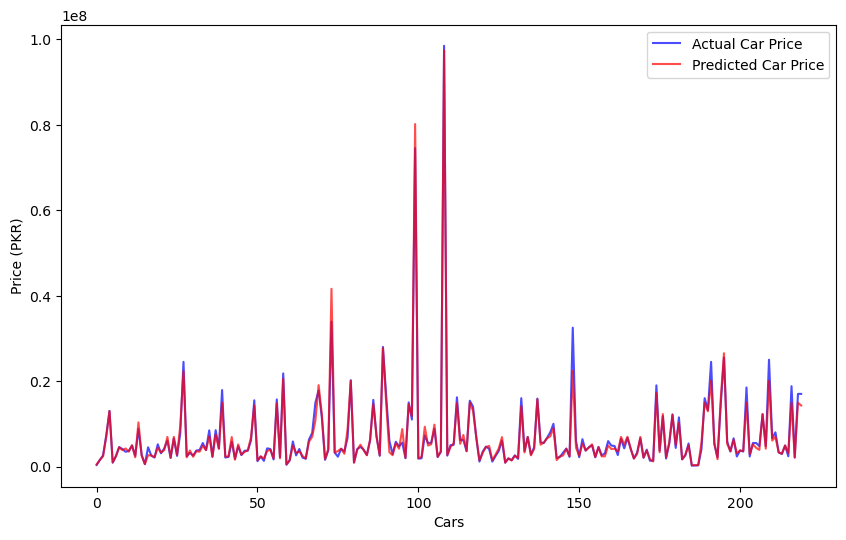

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(actual_price)), actual_price, label='Actual Car Price', color='blue', alpha=0.7)
plt.plot(np.arange(len(predictions_RF)), predictions_RF, label='Predicted Car Price', color='red', alpha=0.7)

plt.xlabel('Cars')
plt.ylabel('Price (PKR)')
plt.legend()

plt.show()


In [65]:
mae_RF=mean_absolute_error(actual_price, predictions_RF)
mse_RF=mean_squared_error(actual_price, predictions_RF)
r2score_RF=r2_score(actual_price, predictions_RF)
print (f"Mean Absoulute Error: {mae_RF}, Mean Squared Error: {mse_RF}, R2 Score: {r2score_RF}")

Mean Absoulute Error: 710854.0012728856, Mean Squared Error: 1882687173996.866, R2 Score: 0.9801848540202645


# Validation of Cat Boost Regressor  (BEST)

In [66]:
cat_boost_regressor=joblib.load("cat_boost_regressor.pkl")
predictions_CBR=cat_boost_regressor.predict(validation_data)

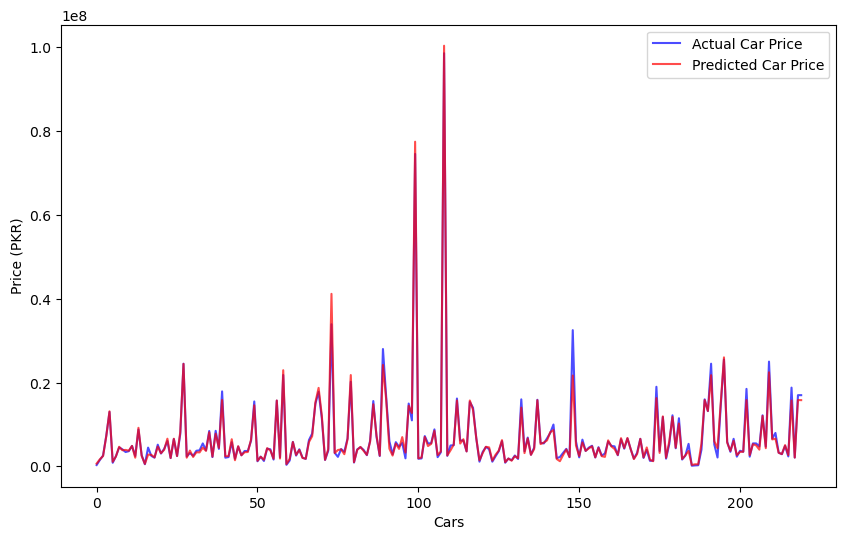

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(actual_price)), actual_price, label='Actual Car Price', color='blue', alpha=0.7)
plt.plot(np.arange(len(predictions_CBR)), predictions_CBR, label='Predicted Car Price', color='red', alpha=0.7)

plt.xlabel('Cars')
plt.ylabel('Price (PKR)')
plt.legend()

plt.show()

In [68]:
mae_CBR=mean_absolute_error(actual_price, predictions_CBR)
mse_CBR=mean_squared_error(actual_price, predictions_CBR)
r2score_CBR=r2_score(actual_price, predictions_CBR)
print (f"Mean Absoulute Error: {mae_CBR}, Mean Squared Error: {mse_CBR}, R2 Score: {r2score_CBR}")

Mean Absoulute Error: 553701.5813720558, Mean Squared Error: 1382420448536.3557, R2 Score: 0.9854501250279591


# Validation of XGB Regressor

In [69]:
xgb_regressor=joblib.load("XGB_regressor.pkl")
predictions_XGB=xgb_regressor.predict(validation_data)

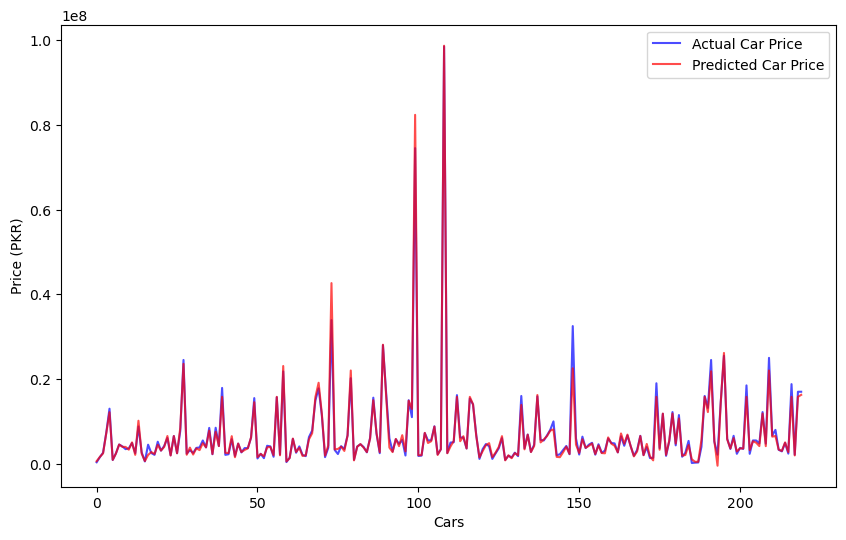

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(actual_price)), actual_price, label='Actual Car Price', color='blue', alpha=0.7)
plt.plot(np.arange(len(predictions_XGB)), predictions_XGB, label='Predicted Car Price', color='red', alpha=0.7)

plt.xlabel('Cars')
plt.ylabel('Price (PKR)')
plt.legend()

plt.show()

In [71]:
mae_XGB=mean_absolute_error(actual_price, predictions_XGB)
mse_XGB=mean_squared_error(actual_price, predictions_XGB)
r2score_XGB=r2_score(actual_price, predictions_XGB)
print (f"Mean Absoulute Error: {mae_XGB}, Mean Squared Error: {mse_XGB}, R2 Score: {r2score_XGB}")

Mean Absoulute Error: 592252.9237215909, Mean Squared Error: 1656871157621.3284, R2 Score: 0.9825615512171462
